## Adaline

In [18]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [19]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.0150265 , -0.01685162,  0.98054798,  0.95338238,  0.02904517],
        [-0.03296202,  1.03516818,  0.04049942,  1.00798383,  0.01478182]]),
 array([[-1, -1, -1,  1, -1]]))

In [20]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [21]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [22]:
perceptrons = []
for w_range in list(np.linspace(0, 1, num=200))[1:]:
    p = Adaline(x_train, d_train, x_test, d_test, 0.0001, 0.4, (-w_range, w_range))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

199

,"weights range (-v, v)",epoch count
0,0.005025,79.396
1,0.010050,79.454
2,0.015075,79.438
3,0.020101,79.435
4,0.025126,79.473
...,...,...
194,0.979899,76.041
195,0.984925,76.127
196,0.989950,76.174
197,0.994975,75.417


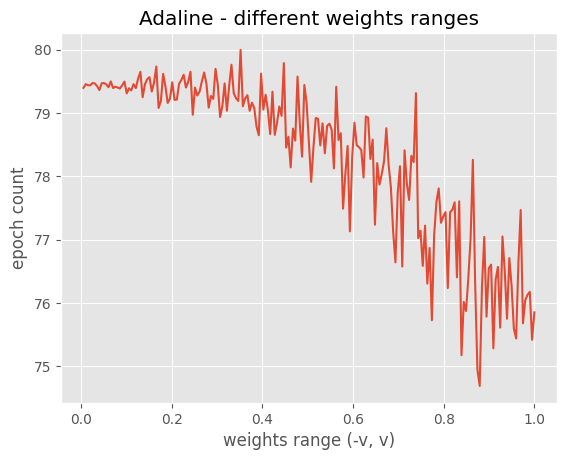

In [23]:
x, y = [x.wrange[1] for x in perceptrons], [x.average_epoch_count for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different weights ranges")
plt.xlabel("weights range (-v, v)")
plt.ylabel("average epoch count")
pd.DataFrame({"weights range (-v, v)":x, "average epoch count":y})